In [75]:
import pandas as pd 
import numpy as np
import json
from PIL import Image
import matplotlib.pyplot as plt
import geopandas as gpd
import cv2
import albumentations as albu
from albumentations.pytorch import ToTensorV2


In [76]:
def visualize(**images):
    """PLot images in one row."""
    n = len(images)
    plt.figure(figsize=(16, 5))
    for i, (name, image) in enumerate(images.items()):
        plt.subplot(1, n, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.title(' '.join(name.split('_')).title())
        plt.imshow(image)
    plt.show()

In [77]:
df = gpd.read_file('train/1.geojson')
image = cv2.imread('data/images/0.png', cv2.IMREAD_COLOR)

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# image = np.array(image / 255, dtype=np.float32)
# image_size = image.shape[:2]
# mask1 = np.zeros(image_size, dtype=np.float32)
mask = cv2.imread('data/masks/0.png')


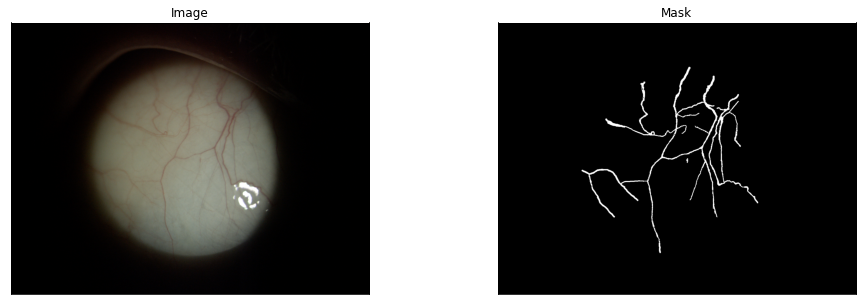

In [78]:
visualize(
    image=image, 
    mask=mask.squeeze(),
)

In [79]:
from albumentations import (
    HorizontalFlip, IAAPerspective, ShiftScaleRotate, CLAHE, RandomRotate90,
    Transpose, ShiftScaleRotate, Blur, OpticalDistortion, GridDistortion, HueSaturationValue,
    IAAAdditiveGaussianNoise, GaussNoise, MotionBlur, MedianBlur, IAAPiecewiseAffine,
    IAASharpen, IAAEmboss, RandomBrightnessContrast, Flip, OneOf, Compose
)
from albumentations.pytorch import ToTensorV2
import numpy as np

In [83]:
size = 1024
def strong_aug(p=0.5):
    return Compose([
        albu.LongestMaxSize(size, interpolation=cv2.INTER_CUBIC, always_apply=True),
        albu.PadIfNeeded(size, size, always_apply=True),
#         albu.RandomCrop(height=512, width=512, always_apply=True),
#         ToTensorV2(transpose_mask=True),
        RandomRotate90(),
        Flip(),
        Transpose(),
        OneOf([
            IAAAdditiveGaussianNoise(),
            GaussNoise(),
        ], p=0.2),
        OneOf([
            MotionBlur(p=0.2),
            MedianBlur(blur_limit=3, p=0.1),
            Blur(blur_limit=3, p=0.1),
        ], p=0.2),
        ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.2, rotate_limit=45, p=0.2),
        OneOf([
            OpticalDistortion(p=0.3),
            GridDistortion(p=0.1),
            IAAPiecewiseAffine(p=0.3),
        ], p=0.2),
        OneOf([
            CLAHE(clip_limit=2),
            IAASharpen(),
            IAAEmboss(),
            RandomBrightnessContrast(),
        ], p=0.3),
        HueSaturationValue(p=0.3),
    ], p=p)

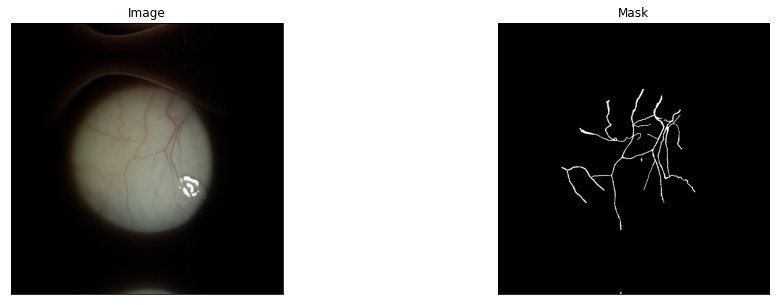

In [84]:
augmentation = strong_aug(p=0.9)
data = {"image": image, "mask": mask}
augmented = augmentation(**data)
imageA, maskA = augmented["image"], augmented["mask"]
visualize(
    image=imageA, 
    mask=maskA.squeeze(),
)

In [85]:
maskA.shape

(1024, 1024, 3)

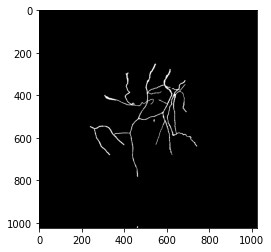

In [86]:
plt.imshow(maskA)

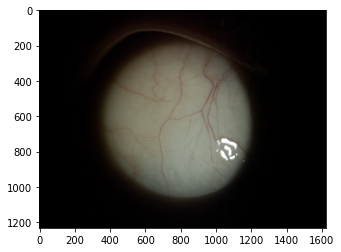

In [13]:
plt.imshow(image)

In [18]:
with open('train/1.geojson', 'r', encoding='cp1251') as f:
    json_contents = json.load(f)

In [21]:
if type(json_contents) == dict and json_contents['type'] == 'FeatureCollection':
        features = json_contents['features']
elif type(json_contents) == list:
        features = json_contents
else:
        features = [json_contents]



In [27]:
features

[{'type': 'Feature',
  'geometry': {'type': 'MultiPolygon',
   'coordinates': [[[[1085, 326],
      [1083, 328],
      [1081, 333],
      [1077, 337],
      [1075, 340],
      [1073, 340],
      [1070, 343],
      [1069, 343],
      [1065, 346],
      [1061, 346],
      [1058, 347],
      [1054, 351],
      [1051, 351],
      [1051, 353],
      [1049, 355],
      [1045, 357],
      [1044, 359],
      [1044, 362],
      [1042, 363],
      [1043, 366],
      [1041, 365],
      [1041, 374],
      [1040, 376],
      [1040, 380],
      [1041, 380],
      [1041, 386],
      [1037, 389],
      [1037, 392],
      [1034, 393],
      [1034, 394],
      [1028, 394],
      [1028, 393],
      [1025, 393],
      [1025, 394],
      [1021, 394],
      [1021, 396],
      [1024, 400],
      [1021, 403],
      [1021, 406],
      [1020, 408],
      [1017, 409],
      [1012, 413],
      [1008, 417],
      [1008, 420],
      [1006, 421],
      [1006, 426],
      [1002, 430],
      [1002, 434],
      [999, 4

In [33]:
for shape in features:
    print(shape['geometry']['coordinates'], end='\n\n')

[[[[1085, 326], [1083, 328], [1081, 333], [1077, 337], [1075, 340], [1073, 340], [1070, 343], [1069, 343], [1065, 346], [1061, 346], [1058, 347], [1054, 351], [1051, 351], [1051, 353], [1049, 355], [1045, 357], [1044, 359], [1044, 362], [1042, 363], [1043, 366], [1041, 365], [1041, 374], [1040, 376], [1040, 380], [1041, 380], [1041, 386], [1037, 389], [1037, 392], [1034, 393], [1034, 394], [1028, 394], [1028, 393], [1025, 393], [1025, 394], [1021, 394], [1021, 396], [1024, 400], [1021, 403], [1021, 406], [1020, 408], [1017, 409], [1012, 413], [1008, 417], [1008, 420], [1006, 421], [1006, 426], [1002, 430], [1002, 434], [999, 438], [999, 442], [998, 444], [995, 443], [995, 453], [994, 453], [994, 456], [991, 459], [991, 462], [989, 466], [988, 466], [986, 470], [986, 475], [985, 475], [985, 485], [983, 488], [983, 497], [985, 501], [985, 504], [984, 507], [982, 506], [981, 510], [983, 509], [980, 514], [978, 514], [977, 516], [972, 520], [971, 522], [971, 525], [970, 525], [970, 542], [

In [41]:
for shape in features:
    coordinates = shape['geometry']['coordinates']
    if len(coordinates) == 1: 
            points = [np.int32(coordinates)] 
            cv2.fillPoly(mask, points, 1) 
    else: 
#         points = [np.int32([coordinates[0]])] 
#         cv2.fillPoly(mask, points, 1) 
        for polygon in coordinates:
#             print(polygon, end='\n\n')
        
            points = [np.int32([[polygon]])] 
            cv2.fillPoly(mask, points, 0) 
                
#     if shape['type'] == 'MultiPolygon':
#         for polygon in coordinates:
#             mask += EyeDataset.parse_polygon(polygon, image_size)
#     else:
#         mask += EyeDataset.parse_polygon(coordinates, image_size)

error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\drawing.cpp:2396: error: (-215:Assertion failed) p.checkVector(2, CV_32S) >= 0 in function 'cv::fillPoly'


In [20]:
 json_contents

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'geometry': {'type': 'MultiPolygon',
    'coordinates': [[[[1085, 326],
       [1083, 328],
       [1081, 333],
       [1077, 337],
       [1075, 340],
       [1073, 340],
       [1070, 343],
       [1069, 343],
       [1065, 346],
       [1061, 346],
       [1058, 347],
       [1054, 351],
       [1051, 351],
       [1051, 353],
       [1049, 355],
       [1045, 357],
       [1044, 359],
       [1044, 362],
       [1042, 363],
       [1043, 366],
       [1041, 365],
       [1041, 374],
       [1040, 376],
       [1040, 380],
       [1041, 380],
       [1041, 386],
       [1037, 389],
       [1037, 392],
       [1034, 393],
       [1034, 394],
       [1028, 394],
       [1028, 393],
       [1025, 393],
       [1025, 394],
       [1021, 394],
       [1021, 396],
       [1024, 400],
       [1021, 403],
       [1021, 406],
       [1020, 408],
       [1017, 409],
       [1012, 413],
       [1008, 417],
       [1008, 420],
 